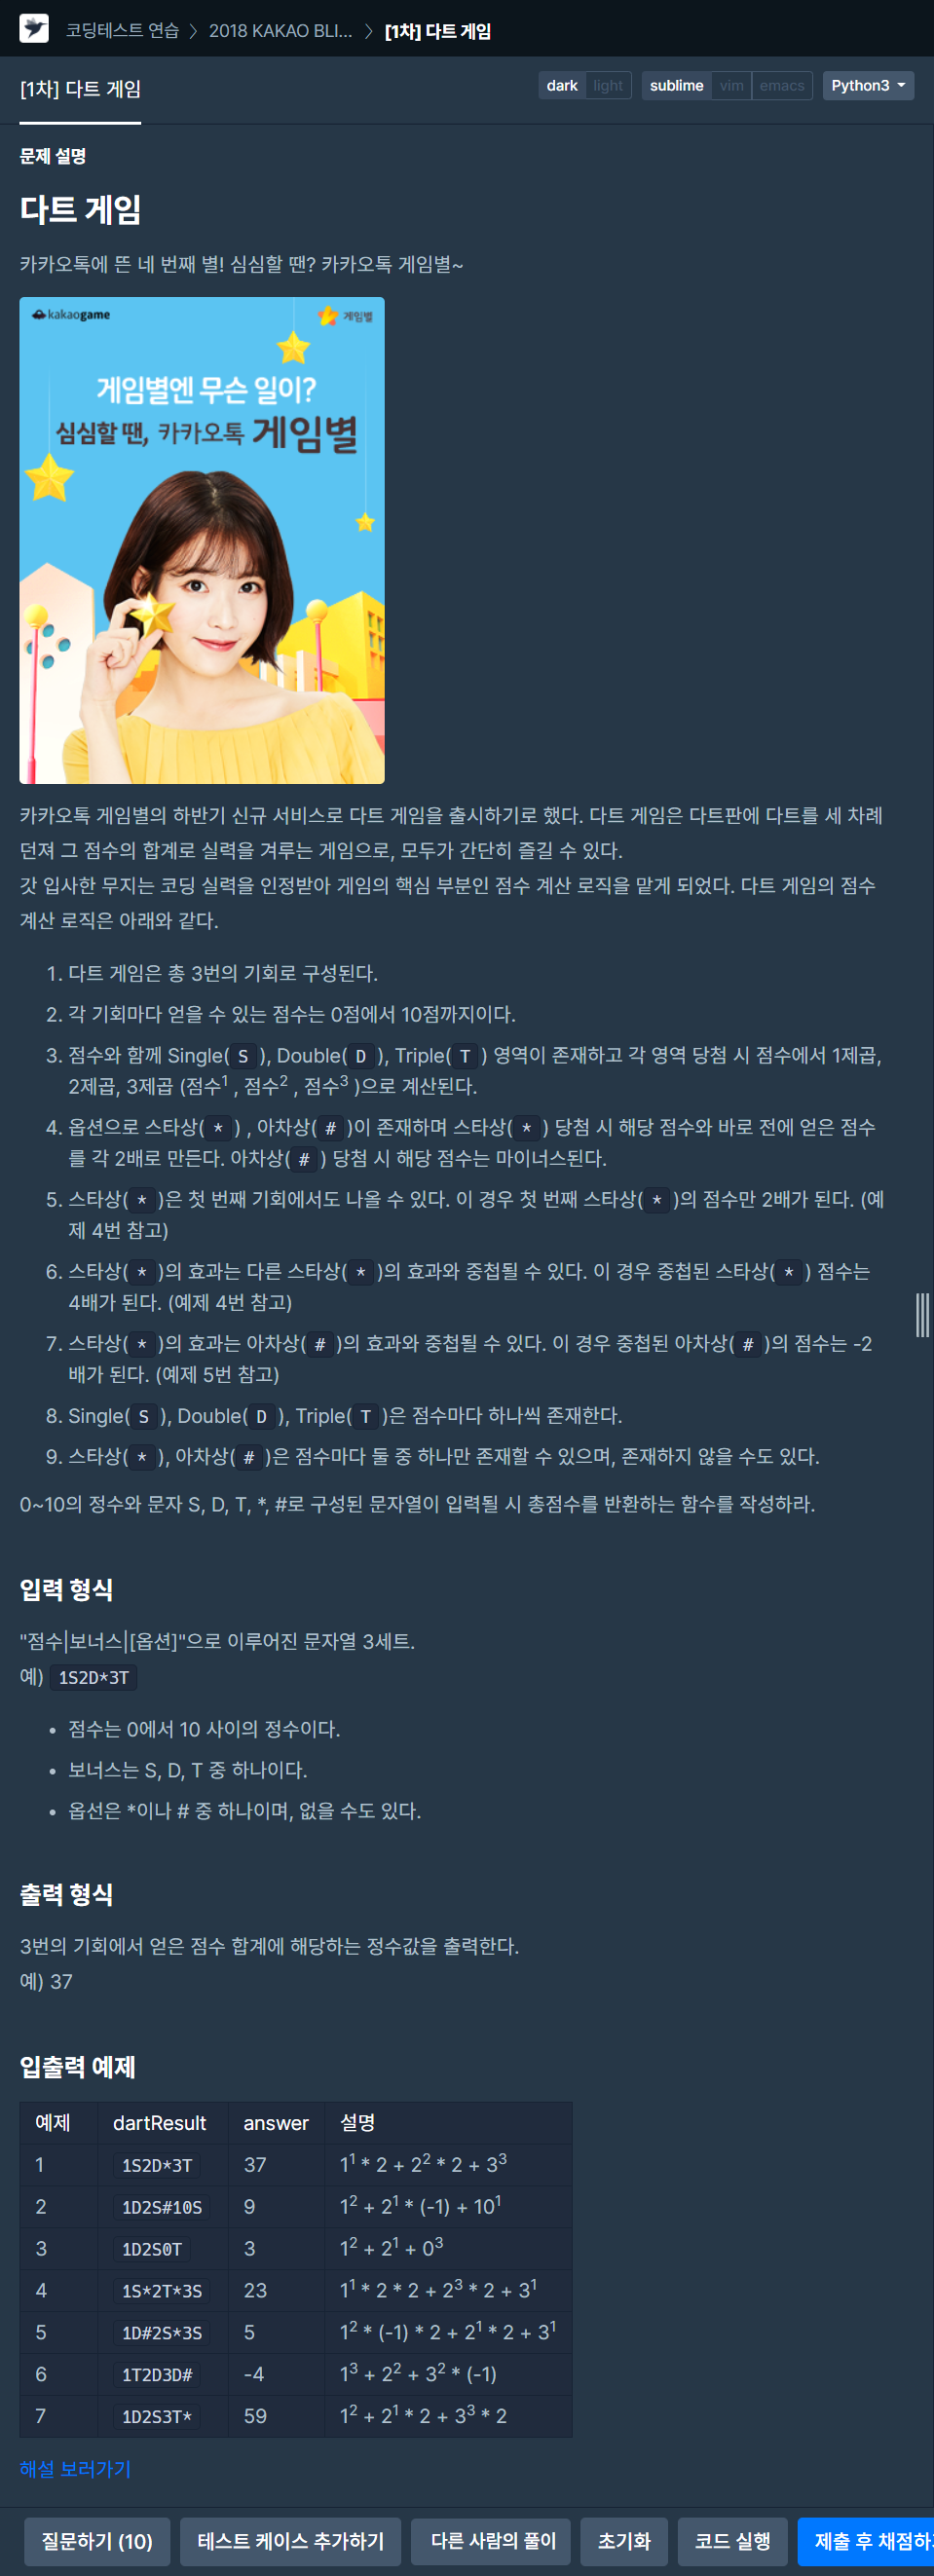

너무 지저분하게 품,, 이렇게풀면 절대안될듯

In [49]:
s = '1S2D*3T'

# 11:55

def solution(dartResult):
    answer = 0
    str_list = [i for i in list(dartResult)]
    num_list = [str(num) for num in range(11)]

    base = []
    for index , i in enumerate(str_list):

        if i in num_list:
            x = []

            base.append(x)

            if (i=='1') and (str_list[index+1] =='0'):

                continue

            if (i=='0') and (str_list[index-1]=='1'):
                x.append('10') 
                continue

        x.append(i)
    #==============================

    print(base)


    cal_index = []

    for z, row in enumerate(base):
        eval_ =''

        for index in row:
            try:

                eval_+= str(int(index))

            except:
                if index=='S':
                    eval_+= '**1'
                elif index=='D':
                    eval_+= '**2'
                elif index=='T':
                    eval_+= '**3'

                elif index=='*':
                    eval_+='*2'

                    if z!=0:
                        cal_index[z-1] += '*2'

                elif index=='#':
                    eval_+='*(-1)'

        cal_index.append(eval_)

    print(cal_index)
    for i in cal_index:
        try:
            answer += eval(i)
        except:
            pass
    return answer
    

solution(s)

[['1', 'S'], ['2', 'D', '*'], ['3', 'T']]
['1**1*2', '2**2*2', '3**3']


37

###### 1. 다른사람의 풀이 - 정규표현식
- 가장 깔끔한듯함
- 내가 시도해본것은 정규표현식이 아닌, SPLIT으로 나눌랬는데 그 과정이 잘 안됐음
- 정규표현식에 대한 이해만 있었어도, 이런식으로 풀이를 접했을듯

In [51]:
import re

dartResult = '1S2D*3T'

def solution(dartResult):
    bonus = {'S' : 1, 'D' : 2, 'T' : 3}
    option = {'' : 1, '*' : 2, '#' : -1}
    
    p = re.compile('(\d+)([SDT])([*#]?)')
    dart = p.findall(dartResult)
    
    for i in range(len(dart)):
        if dart[i][2] == '*':
            dart[i-1] *= 2
        dart[i] = int(dart[i][0]) ** bonus[dart[i][1]] * option[dart[i][2]]

    print('dart : ', dart)
    
    answer = sum(dart)
    return answer


solution(dartResult)

dart :  [2, 8, 27]


37

정규표현식 연습

In [52]:
dartResult = '1S2D*3T'

p = re.compile('(\d+)([SDT])([*#]?)')
dart = p.findall(dartResult)

print(dart)

[('1', 'S', ''), ('2', 'D', '*'), ('3', 'T', '')]


##### 2. 다른사람의 풀이 - split / slicing

In [64]:
def solution(dartResult):
    
    import re
    
    bonus = {'S': 1, 
             'D': 2,
             'T': 3}
    arr = re.split(r'\d+', dartResult)[1:]
    res = re.findall(r'\d+', dartResult)
    
    print('arr : ', arr)
    print('res : ', res)
    
    for i in range(len(arr)):
        if len(arr[i]) == 1:
            res[i]= int(res[i]) ** bonus[arr[i][0]]
        else:
            if arr[i][1] == '#':
                res[i] = (int(res[i])**bonus[arr[i][0]]) * -1
            else:
                res[i] = (int(res[i])**bonus[arr[i][0]]) * 2
                if i != 0:
                    res[i-1] *= 2
    answer = sum(res)
    return answer

solution(dartResult)

arr :  ['S', 'D*', 'T']
res :  ['1', '2', '3']


37